In [1]:
import cv2, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from pathlib import Path
from image_cutter import *
from data.create_lmdb_dataset import *
import hashlib
import random

plt.style.use("dark_background")
%matplotlib inline

In [2]:
paths = [str(p) for p in Path("data/tabs").glob("**/*.png")]
print(f"Found {len(paths)} tabs")

Found 32 tabs


data/tabs/unknown (25).png 237c46d780
skipping
data/tabs/unknown (13).png cfd875e519
skipping
data/tabs/unknown (29).png 980023be85
0
data/tabs/unknown (1).png c65e9778f2
skipping
data/tabs/unknown (28).png 846dc4a464
skipping
data/tabs/unknown (12).png 91ea01eec5
skipping
data/tabs/unknown (24).png fe4ffabf2c
skipping
data/tabs/unknown (15).png 4ef3b6dd3f
skipping
data/tabs/unknown (7).png 4921f9f30b
skipping
data/tabs/unknown (19).png 30764b6168
skipping
data/tabs/unknown.png 737787374c
skipping
data/tabs/unknown (23).png 2868126240
skipping
data/tabs/unknown (22).png 99eb244d20
skipping
data/tabs/unknown (18).png 2628629bc1
skipping
data/tabs/unknown (6).png a10ae78a87
skipping
data/tabs/unknown (14).png de03754ebf
skipping
data/tabs/unknown (5).png e2d5e1294b
skipping
data/tabs/unknown (17).png 0b176eef3f
skipping
data/tabs/unknown (9).png 8d767f20e7
skipping
data/tabs/unknown (21).png 5b0077d7b9
skipping
data/tabs/unknown (20).png 0a0396be24
skipping
data/tabs/unknown (8).png b16c

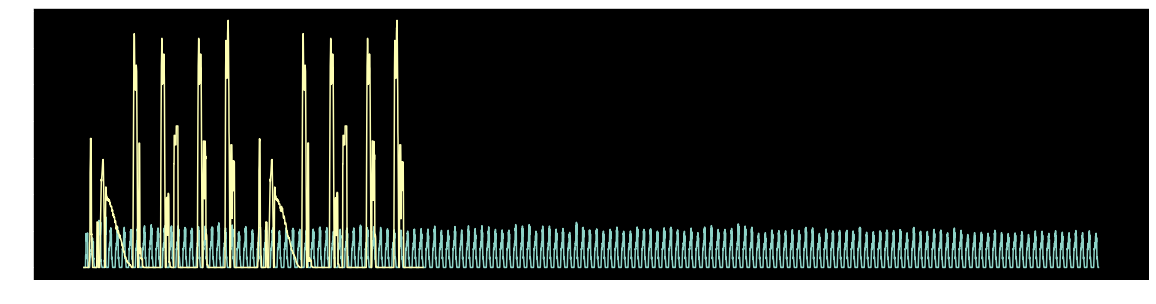

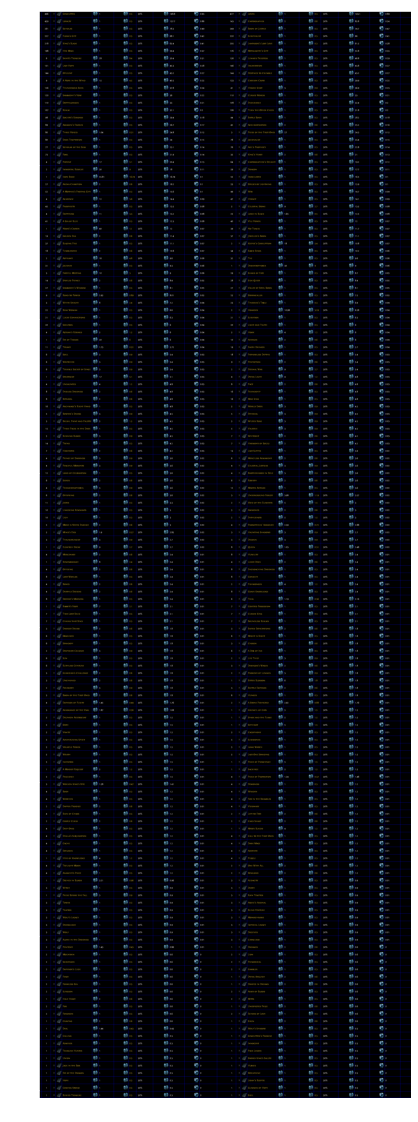

In [3]:
cols_of_interest = [1, 6, 8, 11, 13, 14, 19, 21, 24, 26]
for path in paths:
    img_hash = hashlib.sha224(str(path).encode()).hexdigest()[:10]
    print(path, img_hash)
    img = cv2.imread(path)
    root = f"data/handlabeling/{img_hash}"
    if os.path.isdir(root):
        print("skipping")
        continue
    os.makedirs(root, exist_ok=True)
    try:
        frags = cut_image_to_frags(img)
    except Exception as e:
        print(f"{path,img_hash} could not be processed:{e}")
        plt.figure(figsize=(40, 40))
        plt.imshow(img)
        raise
        continue

    for col in cols_of_interest:
        for row, frag in enumerate(frags[col]):
            try:
                _frag = normalize_frag(frag, target=(32, 80))
                cv2.imwrite(f"{root}/{col}_{row}.png", _frag)
            except Exception as e:
                plt.figure()
                plt.imshow(frag)
                plt.show()
                print("exception", e)

In [5]:
input("Continue?")
handlabels = "data/handlabeled.txt"
data_valid_txt = "data/valid.txt"
data_train_txt = "data/train.txt"
with open(handlabels) as f:
    all_lines = f.readlines()
all_lines = [line for line in all_lines if not "empty" in line]
train_test_split = 0.1
random.shuffle(all_lines)
split = int(len(all_lines) * train_test_split)
with open(data_train_txt, "w") as f:
    f.writelines(all_lines[split:])
with open(data_valid_txt, "w") as f:
    f.writelines(all_lines[:split])

createDataset(".", data_valid_txt, "data/valid")
createDataset(".", data_train_txt, "data/train")

Continue?y
Created dataset with 216 samples
Written 1000 / 1949
Created dataset with 1949 samples
